# 1 - What are image convolutions?

Basically, the process of convolution in images is an *element-wise multiplication of two matrices followed by a sum* [1]. The main idea follows these three steps:

<ol>
    <li>Take two matrices (which both have the same dimensions).</li>
    <li>Multiply them, element-by-element (i.e., not the dot product, just a simple multiplication).</li>
    <li>Sum the elements together.</li>
</ol>

# 2 - What are these matrices? 

To understand the meaning of the matrices, we can make an analogy of ``Big Matrix`` and ``Tiny Matrix``, being the ``Big Matrix`` is an image and the ``Tiny Matrix`` is the kernel. The center of the kernel should be positioned at the top left of the image, also slide from left to right and top to bottom, applying a mathematical operation (i.e., a convolution) at each (x, y)-coordinate of the original image.

<center>
    <figure style="margin-top:20px">
        <img src="images/kernel.png" width="300">
        <figcaption style="margin-top:20px">Figura 1 - Kernel sliding from left to right and up to bottom over the  ``Big Matrix`` [1].</figcaption>
    </figure>
</center>

Now we already know the base of convolution and the meaning of kernels, some questions may appear, like: 

<ol>
    <li>
        <b>What is the purpose of the convolution?</b><br/>
        Produce a new image based on pre-defined kernel and the ``Big Matrix``, where this new image has the same dimension that ``Big Matrix``. 
    </li>
    <li>
        <b>What will we gain with that technique?</b><br/>
        With this tool, we win several ''filters", as blurring and sharpening, also an important aid for edge detections, noise removal, etc.  
    </li>
</ol>

<center>
    <figure style="margin-top:20px">
        <img src="images/examples.png" width="500">
        <figcaption style="margin-top:20px">Figura 2 - Examples of convolutions [1].</figcaption>
    </figure>
</center>

For more informations about kernels and convolution, look the references [2] [3]. 

# 3 - Implementation

To implement a convolution, we can follow the following steps:

<ol>
    <li>Obtain an input image.</li>
    <li>Obtain a kernel matrix that we are going to apply to the input image.</li>
    <li>Create an output image to store the output of the image convolved with the kernel.</li>
    <li>
        For each pixel of input image, do:
        <ol>
            <li>Select an (x, y)-coordinate from the original image.</li>
            <li>Place the center of the kernel at this (x, y)-coordinate.</li>
            <li>Take the element-wise multiplication of the input image region and the kernel, then sum
    up the values of these multiplication operations into a single value. The sum of these
    multiplications is called the kernel output.</li>
            <li>Use the same (x, y)-coordinates from step A, but this time, store the kernel output at the
    same (x, y)-location as the output image.</li>
        </ol>
    </li>
</ol>

<div class="alert alert-info">
<b>Let's start coding.</b>
</div>

In [7]:
# Importing OpenCV, Numpy and pyplot
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity as rescale

In [92]:
# Defining the function to convolve images
def convolve(img, kernel):
    # Obtaining the shape of matrices
    i_rows, i_cols = img.shape[:2]
    k_rows, k_cols = kernel.shape[:2]
    
    # Discovering how many pixels is needed to surround the image
    pad_r = k_rows // 2
    pad_c = k_cols // 2
    
    output = np.zeros((i_rows,i_cols), dtype='float')
    
    img = cv2.copyMakeBorder(img, pad_r, pad_r, pad_c, pad_c, cv2.BORDER_CONSTANT)
        
    for i in range(0, i_rows):
        for j in range(0, i_cols):            
            # Creating a window of same width and height of kernel
            crop = img[i : i + (pad_r * 2) + 1, j : j + (pad_c * 2) + 1]
            
            # Applying product operation
            result = (crop * kernel).sum()
                        
            # Storing the result
            output[i,j] = result
            
    output = rescale(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    
    return output

## 3.1) Kernels

Before we start our tests, let's define some kernels:

<table>
    <tr>
        <th>Operation</th>
        <th>Kernel</th>
        <th>Image</th>
    </tr>
    <tr>
        <td>Identity</td>
        <td>
            $$\begin{matrix}
             0 & 0 & 0 \\
             0 & 1 & 0 \\
             0 & 0 & 0
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png" width="100">
        </td>
    </tr>
    <tr>
        <td>Sobel X</td>
        <td>
            $$\begin{matrix}
             -1 & 0 & 1 \\
             -2 & 0 & 2 \\
             -1 & 0 & 1
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/8/8d/Vd-Edge1.png" width="100">
        </td>
    </tr>
    <tr>
        <td>Sobel Y</td>
        <td>
            $$\begin{matrix}
             -1 & -2 & -1 \\
             0 & 0 & 0 \\
             1 & 2 & 1
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/8/83/Vd-Edge2.png" width="100">
        </td>
    </tr>
    <tr>
        <td>Sharpen</td>
        <td>
            $$\begin{matrix}
             0 & -1 & 0 \\
             -1 & 5 & -1 \\
             0 & -1 & 0
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/Vd-Sharp.png" width="100">
        </td>
    </tr>
    <tr>
        <td>Blur</td>
        <td>
            $$\begin{matrix}
             \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
             \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
             \frac{1}{9} & \frac{1}{9} & \frac{1}{9}
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/0/04/Vd-Blur2.png" width="100">
        </td>
    </tr>
</table> 

In [96]:
identity = np.array(([0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]), dtype="int")

sobelX = np.array(([-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]), dtype="int")

sobelY = np.array(([-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]), dtype="int")

sharpen = np.array(([0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]), dtype="int")

blur = np.ones((3,3), dtype='float') / 9

<div class="alert alert-info">
<b>Let's test.</b>
</div>

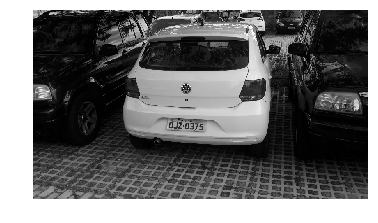

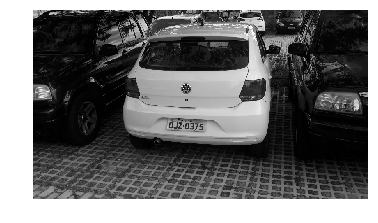

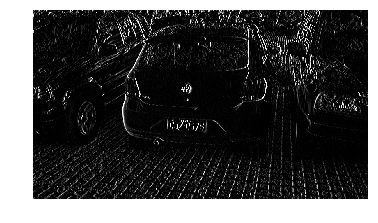

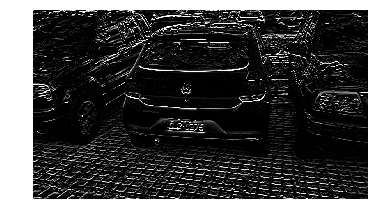

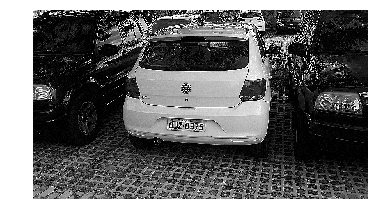

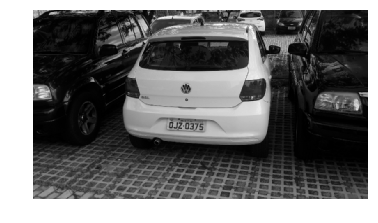

In [105]:
img = cv2.imread('images/car.jpg', 0)

# Shape of image
rows, cols = img.shape

# Scale factor
scale = 0.25

# Scaled image
img = cv2.resize(img, (round(scale * cols), round(scale * rows)))

result_identity = convolve(img, identity)
result_sobelx = convolve(img, sobelX)
result_sobely = convolve(img, sobelY)
result_sharpen = convolve(img, sharpen)
result_blur = convolve(img, blur)

# Showing our image
plt.figure()
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.show()

plt.figure()
plt.axis("off")
plt.imshow(result_identity, cmap='gray')
plt.show()

plt.figure()
plt.axis("off")
plt.imshow(result_sobelx, cmap='gray')
plt.show()

plt.figure()
plt.axis("off")
plt.imshow(result_sobely, cmap='gray')
plt.show()

plt.figure()
plt.axis("off")
plt.imshow(result_sharpen, cmap='gray')
plt.show()

plt.figure()
plt.axis("off")
plt.imshow(result_blur, cmap='gray')
plt.show()

In [108]:
sobelxx = (result_sobelx * result_sobelx)
sobelyy = (result_sobely * result_sobely)
sobelxy = sobelxx + sobelyy

sobelxy = rescale(sobelxy, in_range=(0, 255))
sobelxy = (sobelxy * 255).astype("uint8")

print(sobelxy)

plt.figure()
plt.axis("off")
plt.imshow(result_blur, cmap='gray')
plt.show()

[[254  27 174 ... 124 166 240]
 [219 120  70 ... 112 156   0]
 [255 240  14 ... 207 112   0]
 ...
 [254  24 110 ... 135   0   0]
 [230 176 214 ... 220 135 175]
 [255 119  28 ...   0   0   0]]


# References

[1] Rosebrock, A., 2017. Deep Learning for Computer Vision with Python. 1st ed. https://www.pyimagesearch.com: PyImageSearch.

[2] Leonardo Araujo dos Santos. 2018. Convolution · Artificial Inteligence. [ONLINE] Available at: https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolution.html. [Accessed 01 May 2018].

[3] Explained Visually. 2018. Image Kernels explained visually. [ONLINE] Available at: http://setosa.io/ev/image-kernels/. [Accessed 01 May 2018].